In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import sys
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import datetime

import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [4]:
import datetime

import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
pd.read_csv('AirPassengers.csv')

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
Air= pd.read_csv('AirPassengers.csv')

In [7]:
Air= pd.read_csv('AirPassengers.csv',index_col=0,parse_dates=True)

In [8]:
Air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
Air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
Air.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [12]:
Air.describe(include='all')

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [13]:
Air.columns

Index(['#Passengers'], dtype='object')

In [14]:
Air.isna().sum()

#Passengers    0
dtype: int64

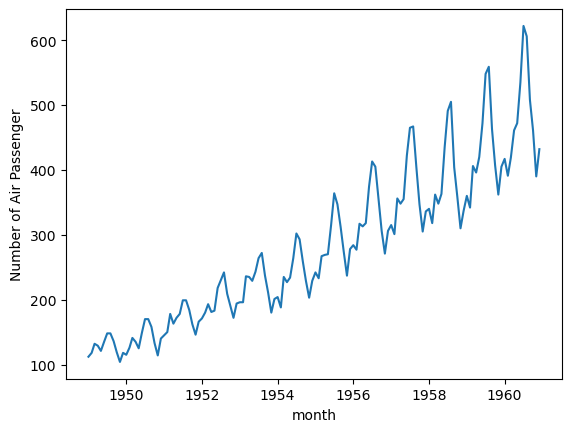

In [15]:
plt.xlabel('month')
plt.ylabel('Number of Air Passenger')
plt.plot(Air)

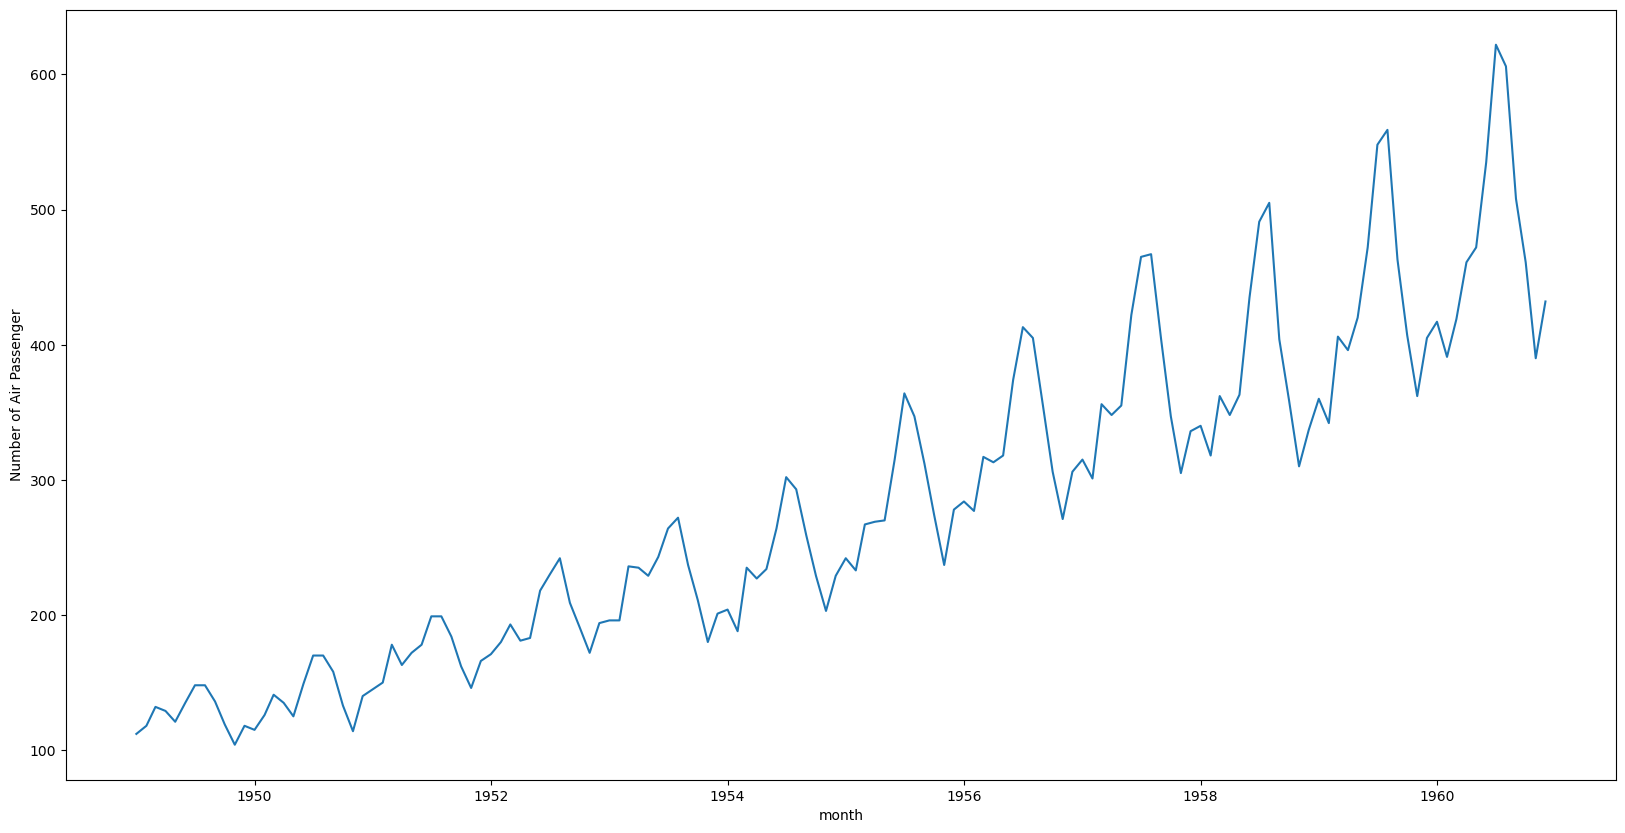

In [16]:
plt.figure(figsize=(20,10))
plt.xlabel('month')
plt.ylabel('Number of Air Passenger')
plt.plot(Air)
plt.show()

In [17]:
### Testing For Stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
#Ho: It is non stationary
#H1: It is stationary


In [20]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Legs Used','Number of Observations Used']
    for value,labels in zip(result,labels):
        print(labels+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
        

In [21]:
adfuller_test(Air['#Passengers'])

ADF Test Statistic : 0.8153688792060433
p-value : 0.9918802434376409
#Legs Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
## Differencing

In [23]:
Air['Passengers First Difference'] = Air['#Passengers'] - Air['#Passengers'].shift(1)

In [24]:
Air.head(5)

,#Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [25]:
adfuller_test(Air['Passengers First Difference'].dropna())

ADF Test Statistic : -2.8292668241699865
p-value : 0.05421329028382727
#Legs Used : 12
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
## Use Techniques Differencing
Air['Passengers Second Difference']=Air['Passengers First Difference']-Air['Passengers First Difference'].shift(2)

In [27]:
adfuller_test(Air['Passengers Second Difference'].dropna())

ADF Test Statistic : -15.834423365324886
p-value : 9.857018894070465e-29
#Legs Used : 10
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [28]:
Air['Passengers 3 Difference'] = Air['#Passengers'] - Air['#Passengers'].shift(3)

In [29]:
adfuller_test(Air['Passengers 3 Difference'].dropna())

ADF Test Statistic : -2.8865058565449724
p-value : 0.046939835725107355
#Legs Used : 10
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [30]:
Air['Passengers 4 Difference'] = Air['#Passengers'] - Air['#Passengers'].shift(4)

In [31]:
adfuller_test(Air['Passengers 4 Difference'].dropna())

ADF Test Statistic : -3.0289473658493034
p-value : 0.03227809309801974
#Legs Used : 9
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [32]:
Air['Passengers 5 Difference'] = Air['#Passengers'] - Air['#Passengers'].shift(5)

In [33]:
adfuller_test(Air['Passengers 5 Difference'].dropna())

ADF Test Statistic : -2.786014633966592
p-value : 0.06029941457141685
#Legs Used : 14
Number of Observations Used : 124
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
## ACF and PACF PLOT (AUTO CORELATION PLOT NAD PARTIALAUTO CORELATION PLOT )

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

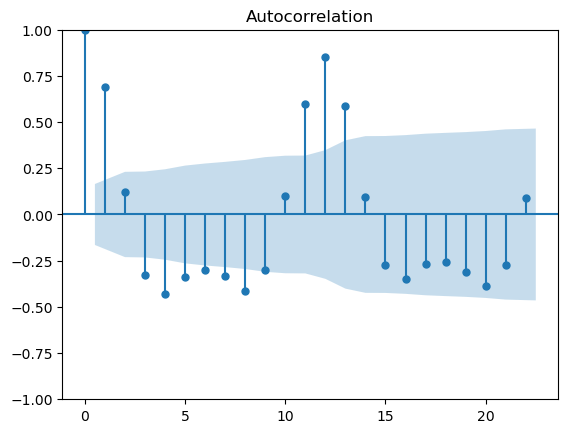

In [35]:
acf = plot_acf(Air['Passengers 3 Difference'].dropna())

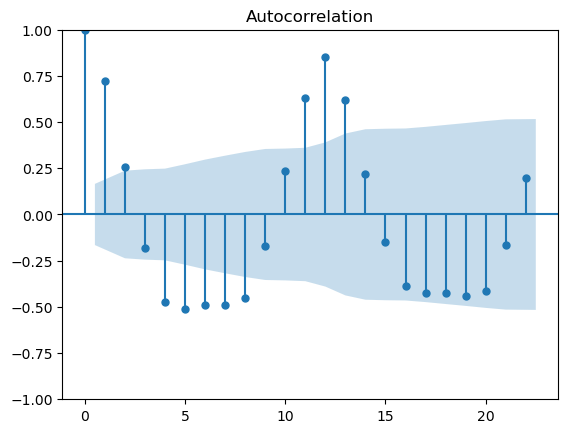

In [36]:
acf = plot_acf(Air['Passengers 4 Difference'].dropna())

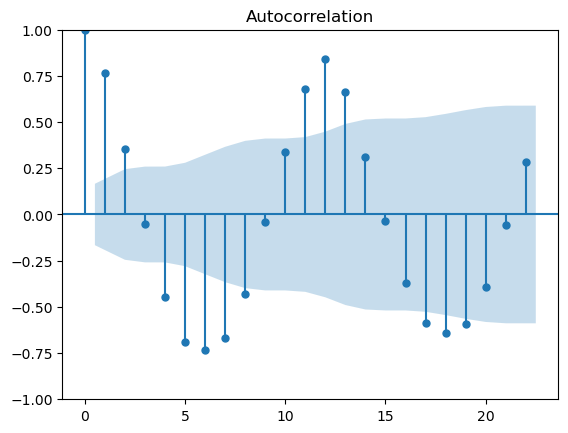

In [37]:
acf = plot_acf(Air['Passengers 5 Difference'].dropna())

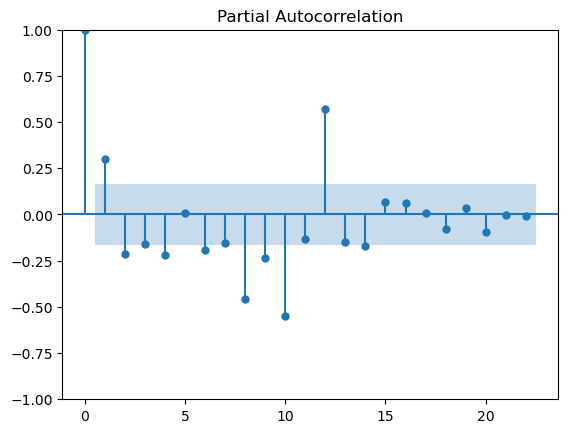

In [38]:
result = plot_pacf(Air["Passengers First Difference"].dropna())

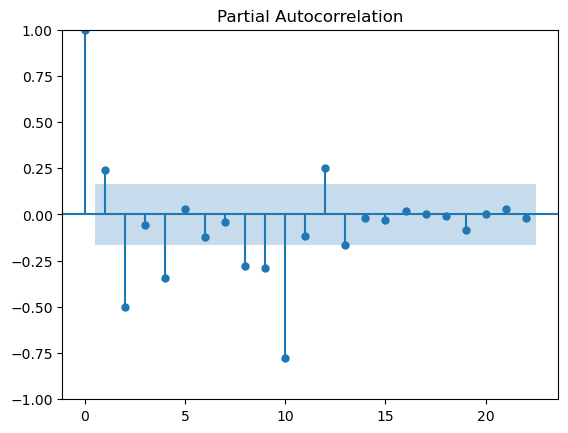

In [39]:
result = plot_pacf(Air['Passengers Second Difference'].dropna())

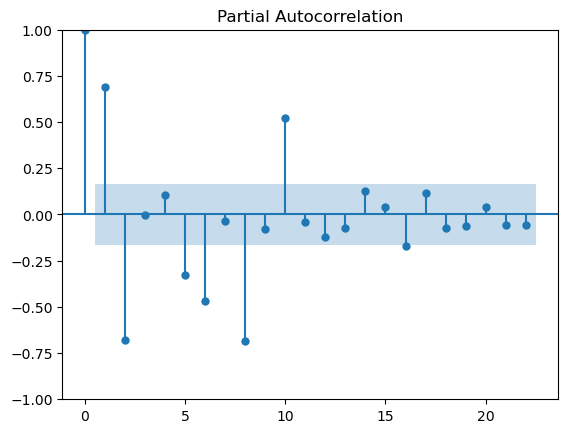

In [40]:
result = plot_pacf(Air['Passengers 3 Difference'].dropna())

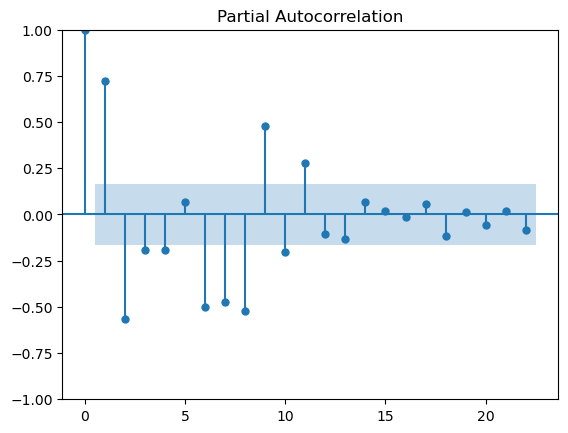

In [41]:
result = plot_pacf(Air['Passengers 4 Difference'].dropna())

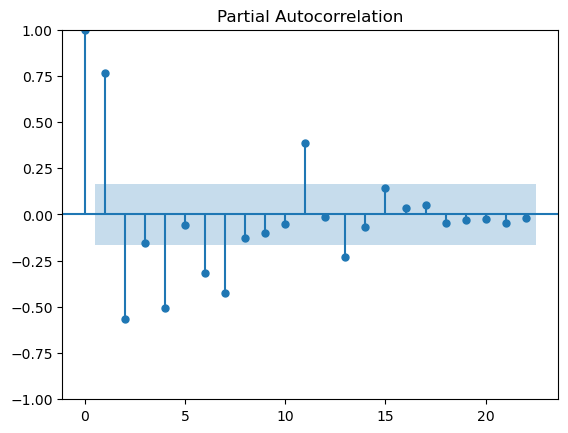

In [42]:
result = plot_pacf(Air['Passengers 5 Difference'].dropna())

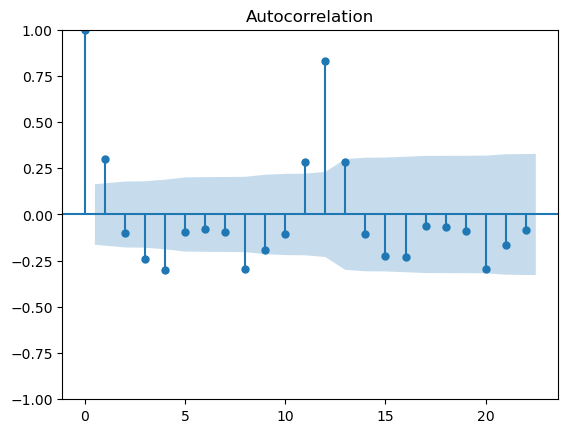

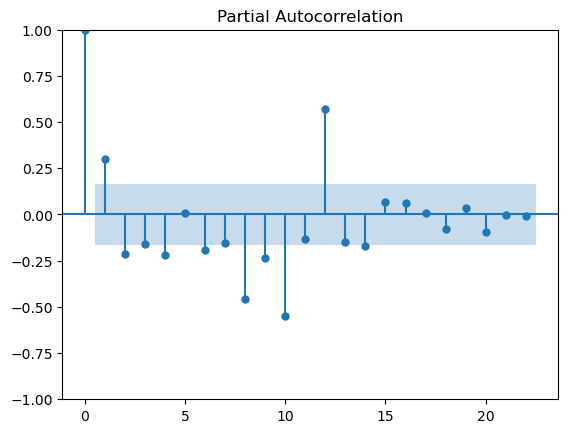

In [43]:
acf12 = plot_acf(Air["Passengers First Difference"].dropna())
pacf12 = plot_pacf(Air["Passengers First Difference"].dropna())

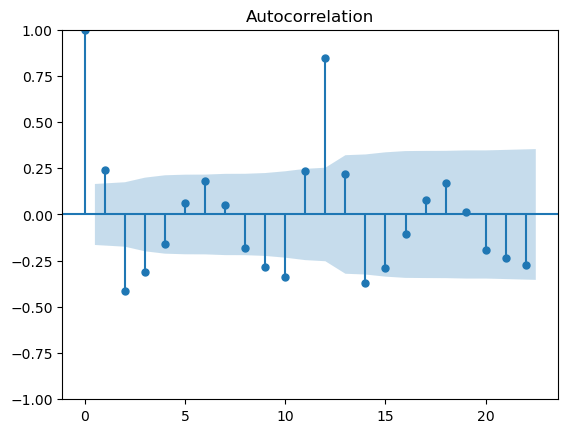

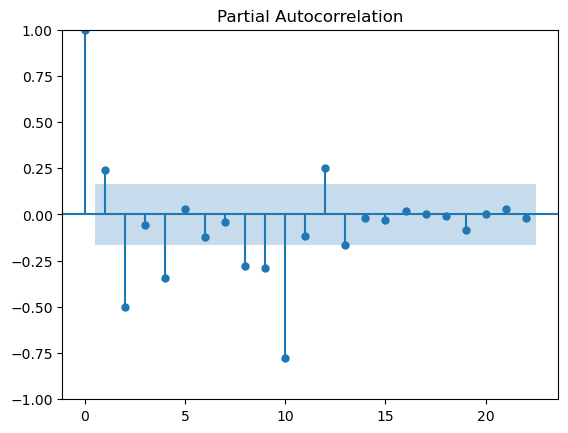

In [44]:
acf12 = plot_acf(Air["Passengers Second Difference"].dropna())
pacf12 = plot_pacf(Air["Passengers Second Difference"].dropna())

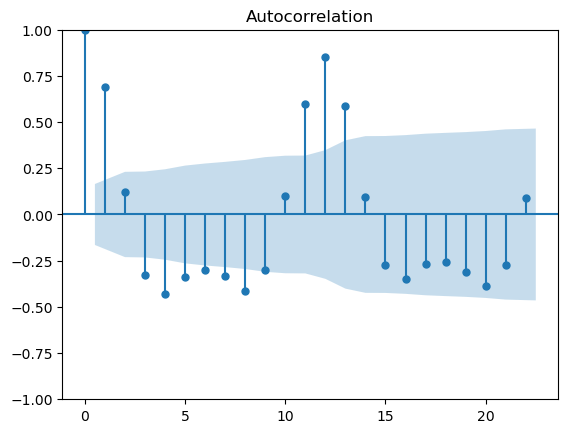

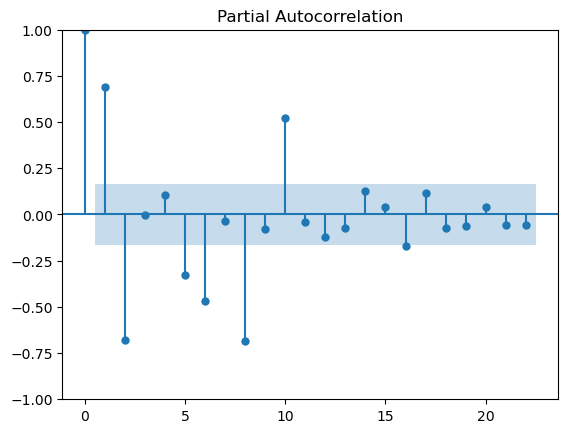

In [45]:
acf12 = plot_acf(Air["Passengers 3 Difference"].dropna())
pacf12 = plot_pacf(Air["Passengers 3 Difference"].dropna())

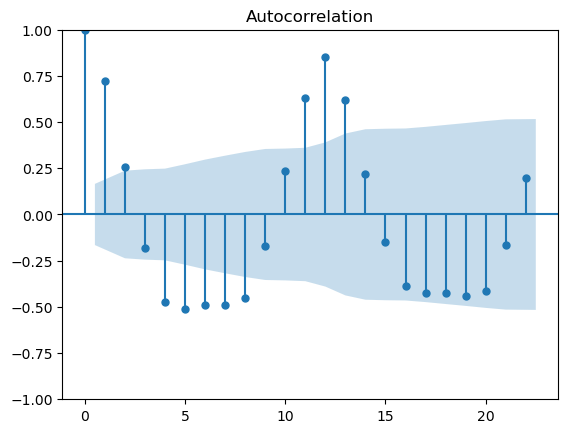

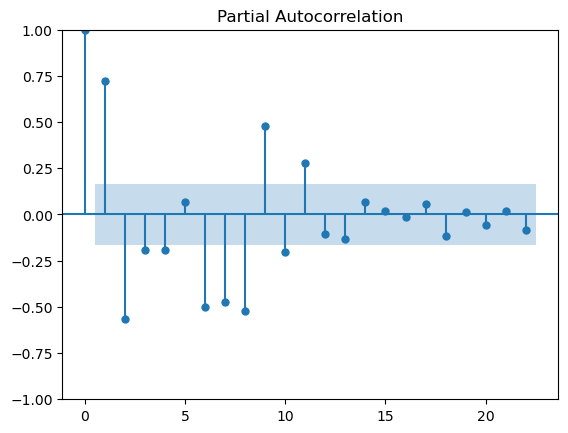

In [46]:
acf12 = plot_acf(Air["Passengers 4 Difference"].dropna())
pacf12 = plot_pacf(Air["Passengers 4 Difference"].dropna())

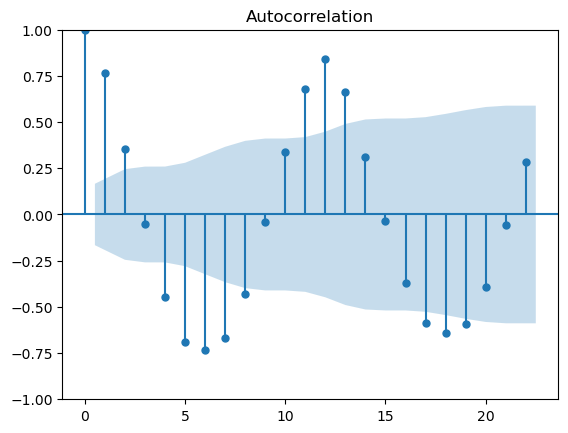

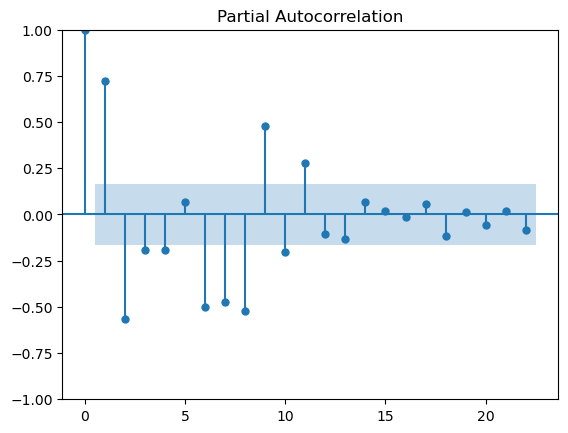

In [47]:
acf12 = plot_acf(Air["Passengers 5 Difference"].dropna())
pacf12 = plot_pacf(Air["Passengers 4 Difference"].dropna())


In [48]:
##ARIMA= P, D, Q (P-AR , I -D , MA -Q)   P(1,1)  D 1 Q (1to 3)

In [51]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(Air['#Passengers'],order=(1,1,1)) 
model_fit=model.fit()

C:\Users\C-Dot\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\C-Dot\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\C-Dot\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

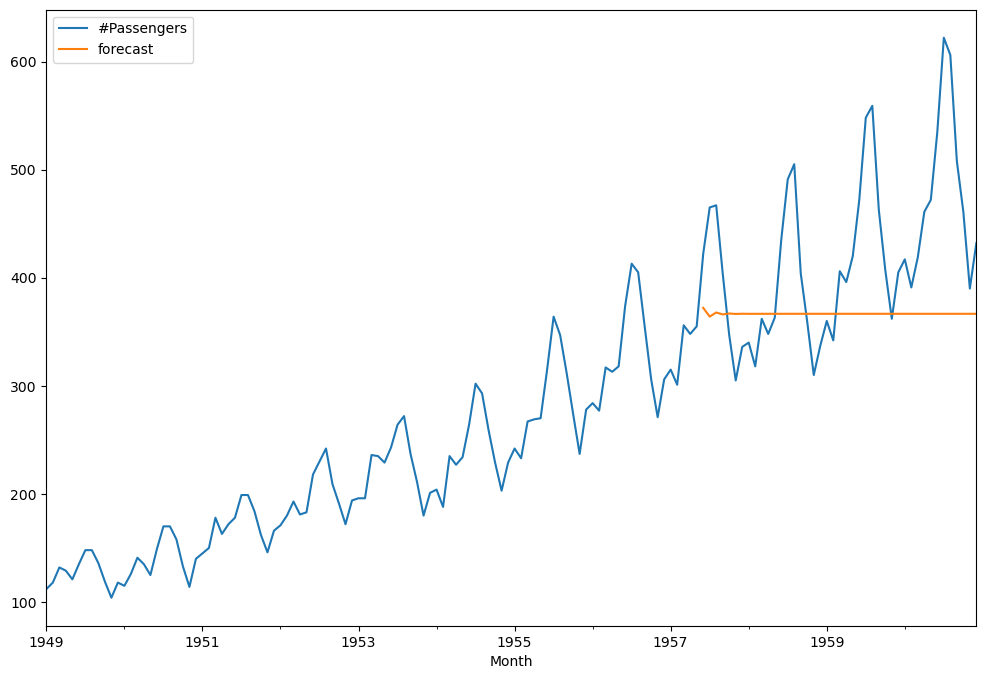

In [55]:
Air['forecast']=model_fit.predict(start=101,end=145,dynamic=True)
Air[['#Passengers','forecast']].plot(figsize=(12,8))


In [58]:
from pandas.tseries.offsets import DateOffset
future_dates=[Air.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [61]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=Air.columns)

In [62]:
future_df=pd.concat([Air,future_datest_df])
future_df

C:\Users\C-Dot\AppData\Local\Temp\ipykernel_13088\4037747292.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([Air,future_datest_df])


,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 3 Difference,Passengers 4 Difference,Passengers 5 Difference,forecast
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,14.0,NaN,NaN,NaN,NaN,NaN
1949-04-01,129,-3.0,-9.0,17.0,NaN,NaN,NaN
1949-05-01,121,-8.0,-22.0,3.0,9.0,NaN,NaN
...,...,...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

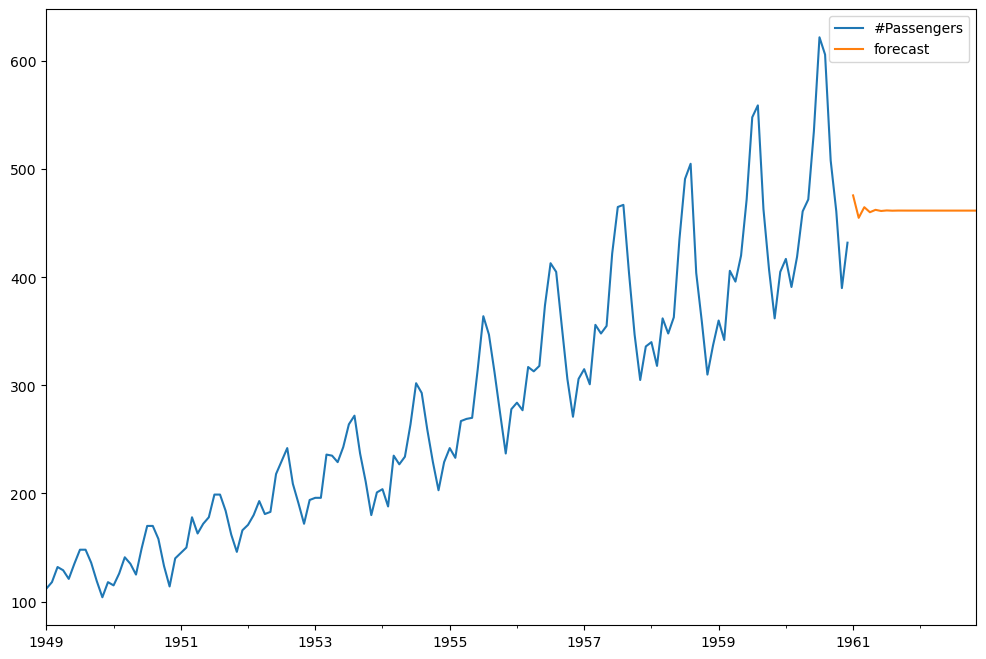

In [65]:
future_df['forecast'] = model_fit.predict(start = 144, end = 200, dynamic= True)  
future_df[['#Passengers', 'forecast']].plot(figsize=(12, 8)) 